In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Input Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


##Memuat Dataset

In [3]:
df = pd.read_excel('/content/drive/MyDrive/SKRIPSWEETT/dataset_pkh_kaligawe_fiks.xlsx')
df

,Nama,NIK,Usia,Pekerjaan,Penghasilan,Jumlah Anggota Keluarga,Jumlah Tanggungan Anak,Status Rumah,Jenis Lantai,Jenis Dinding,Penyandang Disabilitas,Kelayakan
0,Budi Santosa,U1,35,Buruh,1200000,4,2,Milik Sendiri,Keramik,Beton,0,Tidak Layak
1,Impronah,U2,65,Petani,400000,6,3,Milik Sendiri,Semen,Batu-bata,0,Layak
2,Agus Pratama,U3,28,Buruh,1100000,3,1,Milik Sendiri,Semen,Beton,0,Tidak Layak
3,Umi Mulyani,U4,60,Petani,500000,6,3,Milik Sendiri,Kayu,Kayu,0,Layak
4,Siti Nurjanah,U5,44,Buruh,1500000,5,2,Milik Sendiri,Keramik,Beton,0,Tidak Layak
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Khomiatun,U1295,60,Petani,400000,5,3,Milik Sendiri,Semen,Batu-bata,0,Layak
1295,Khotijah,U1296,46,Penjahit,1000000,3,2,Milik Sendiri,Keramik,Beton,0,Tidak Layak
1296,Nur Urip,U1297,61,Petani,600000,7,5,Milik Sendiri,Semen,Batu-bata,0,Layak
1297,Pahioh,U1298,30,Buruh,1000000,4,2,Milik Sendiri,Keramik,Beton,0,Tidak Layak


##EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nama                     1299 non-null   object
 1   NIK                      1299 non-null   object
 2   Usia                     1299 non-null   int64 
 3   Pekerjaan                1299 non-null   object
 4   Penghasilan              1299 non-null   int64 
 5   Jumlah Anggota Keluarga  1299 non-null   int64 
 6   Jumlah Tanggungan Anak   1299 non-null   int64 
 7   Status Rumah             1299 non-null   object
 8   Jenis Lantai             1299 non-null   object
 9   Jenis Dinding            1299 non-null   object
 10  Penyandang Disabilitas   1299 non-null   int64 
 11  Kelayakan                1299 non-null   object
dtypes: int64(5), object(7)
memory usage: 121.9+ KB


In [ ]:
df.head()

,Nama,NIK,Usia,Pekerjaan,Penghasilan,Jumlah Anggota Keluarga,Jumlah Tanggungan Anak,Status Rumah,Jenis Lantai,Jenis Dinding,Penyandang Disabilitas,Kelayakan
0,Budi Santosa,U1,35,Buruh,1200000,4,2,Milik Sendiri,Keramik,Beton,0,Tidak Layak
1,Impronah,U2,65,Petani,400000,6,3,Milik Sendiri,Semen,Batu-bata,0,Layak
2,Agus Pratama,U3,28,Buruh,1100000,3,1,Milik Sendiri,Semen,Beton,0,Tidak Layak
3,Umi Mulyani,U4,60,Petani,500000,6,3,Milik Sendiri,Kayu,Kayu,0,Layak
4,Siti Nurjanah,U5,44,Buruh,1500000,5,2,Milik Sendiri,Keramik,Beton,0,Tidak Layak


In [ ]:
# Analisis Data
print("Deskripsi Statistik Data:")
print(df.describe())

Deskripsi Statistik Data:
              Usia   Penghasilan  Jumlah Anggota Keluarga  \
count  1299.000000  1.299000e+03              1299.000000   
mean     56.565820  6.819477e+05                 5.394149   
std      11.751901  4.551107e+05                 1.462472   
min      27.000000  1.000000e+05                 2.000000   
25%      55.000000  4.000000e+05                 4.000000   
50%      60.000000  5.000000e+05                 6.000000   
75%      65.000000  8.000000e+05                 7.000000   
max      80.000000  2.500000e+06                 8.000000   

       Jumlah Tanggungan Anak  Penyandang Disabilitas  
count             1299.000000                  1299.0  
mean                 3.259430                     0.0  
std                  1.321148                     0.0  
min                  0.000000                     0.0  
25%                  2.000000                     0.0  
50%                  3.000000                     0.0  
75%                  4.000000   

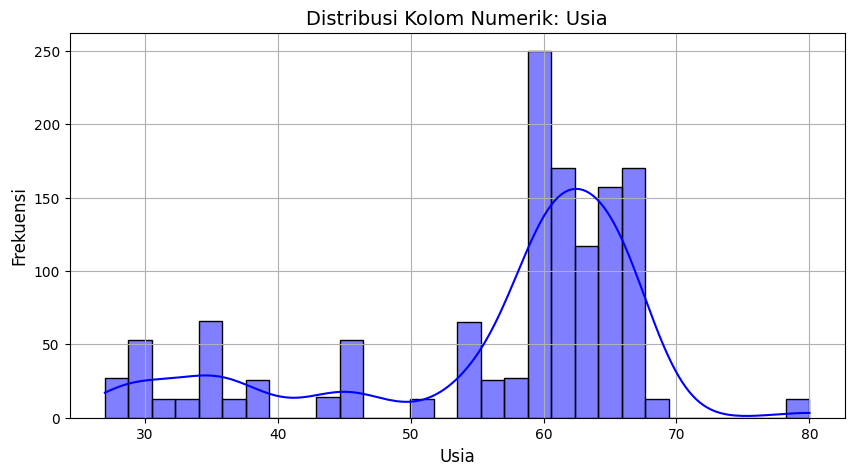

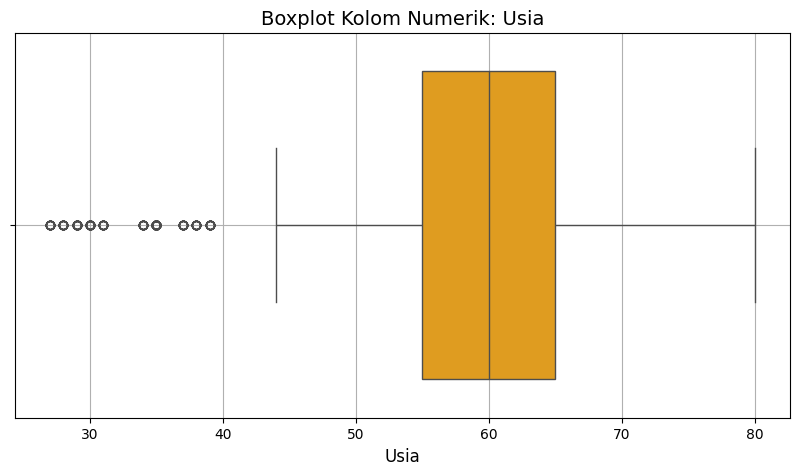

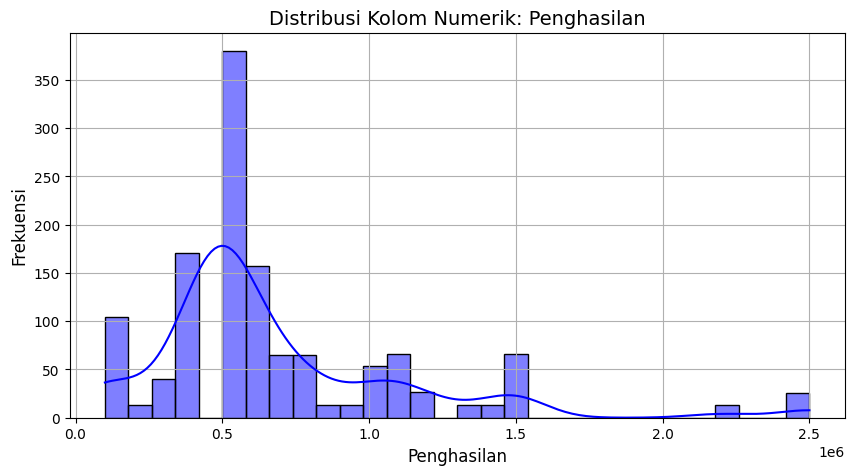

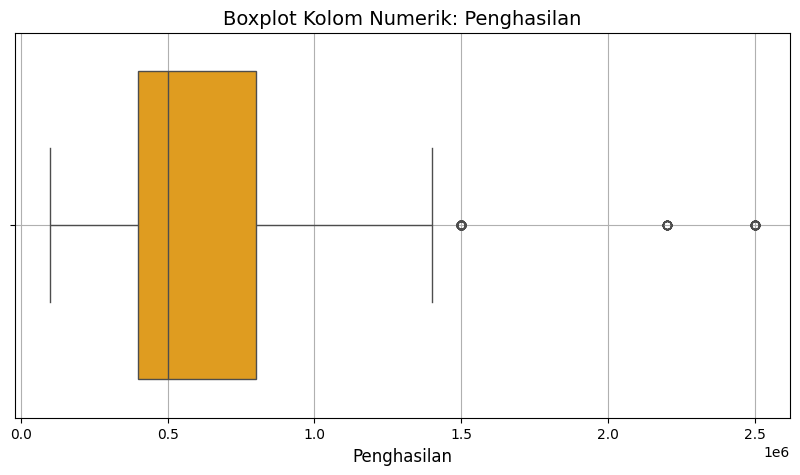

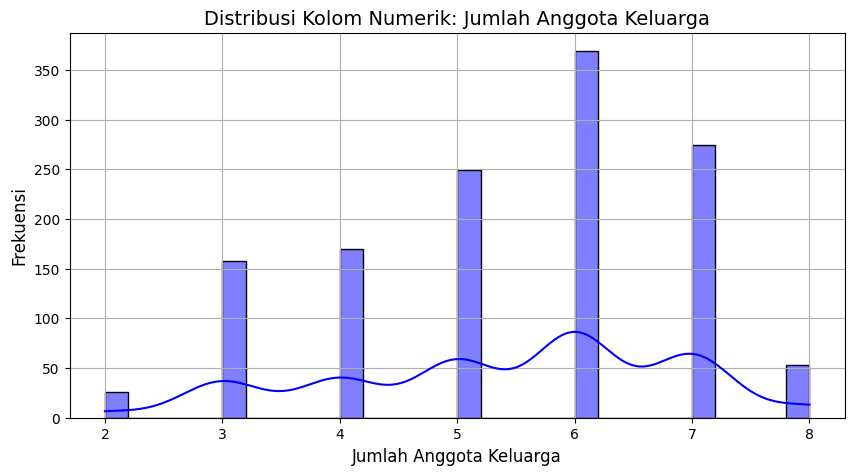

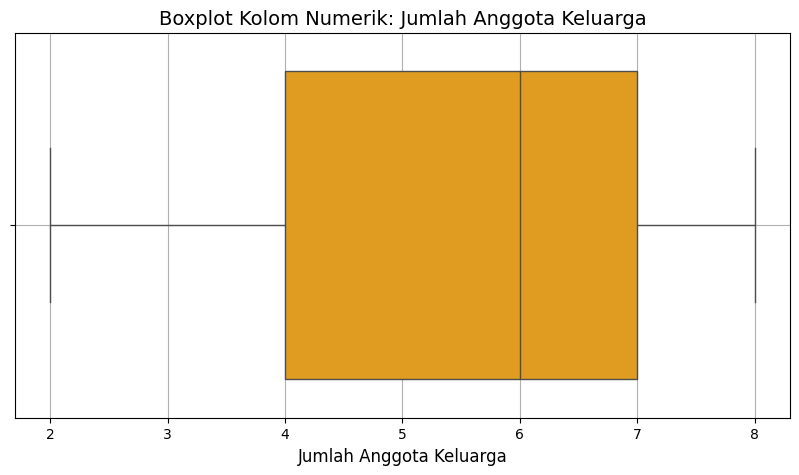

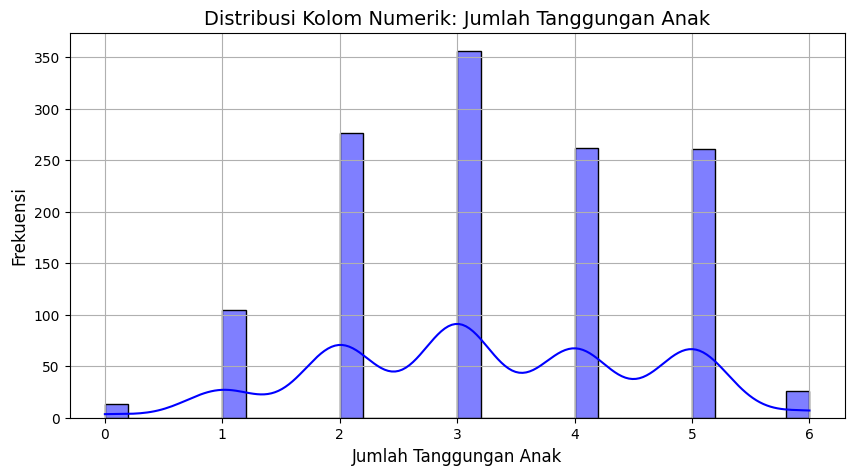

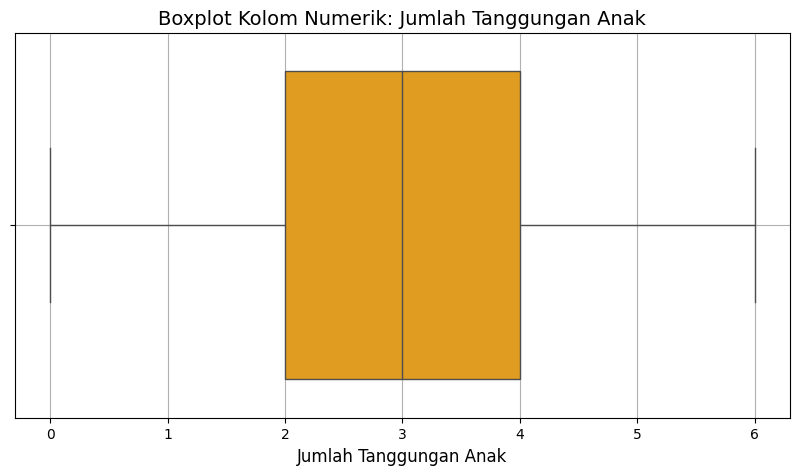

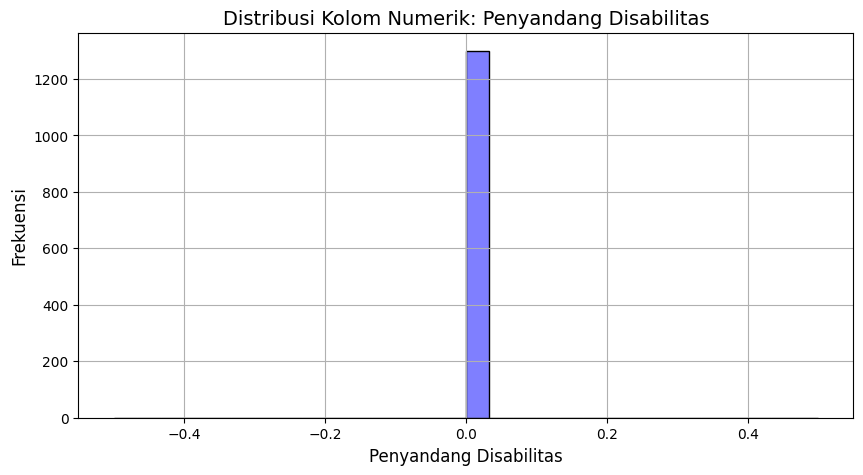

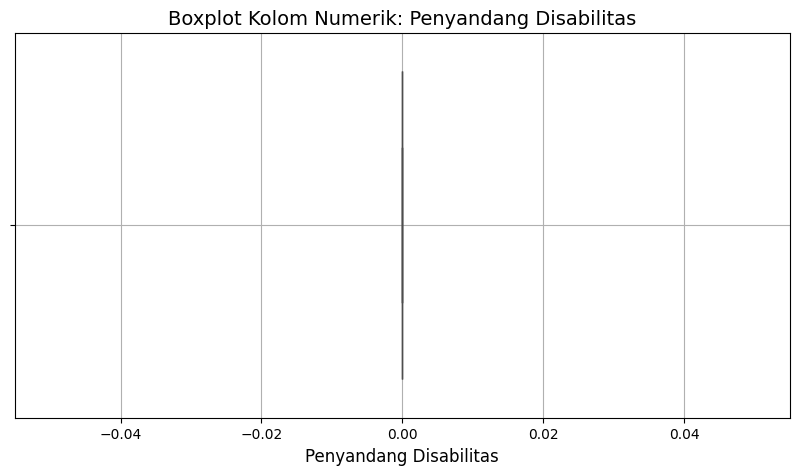

In [5]:
# Visualisasi kolom numerik
numerical_columns = ['Usia', 'Penghasilan', 'Jumlah Anggota Keluarga', 'Jumlah Tanggungan Anak', 'Penyandang Disabilitas']

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi Kolom Numerik: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f'Boxplot Kolom Numerik: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(True)
    plt.show()

<ipython-input-6-56988e6b557f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


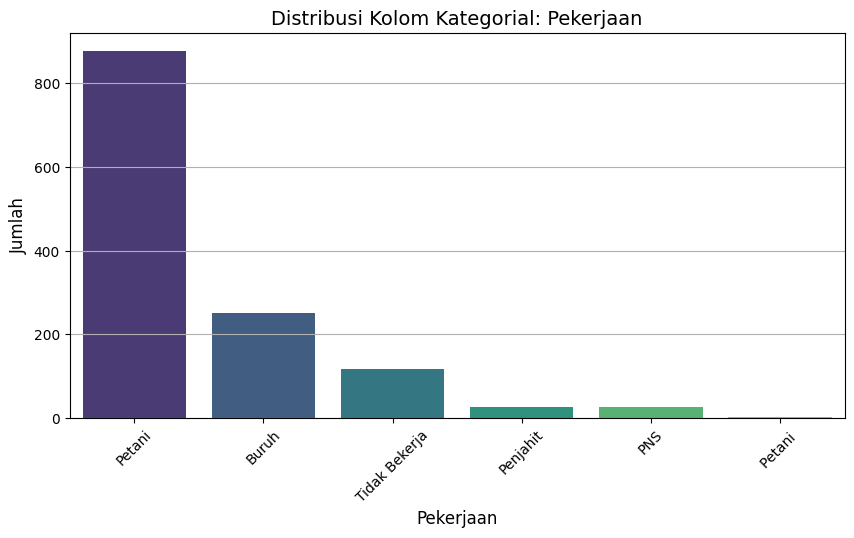

<ipython-input-6-56988e6b557f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


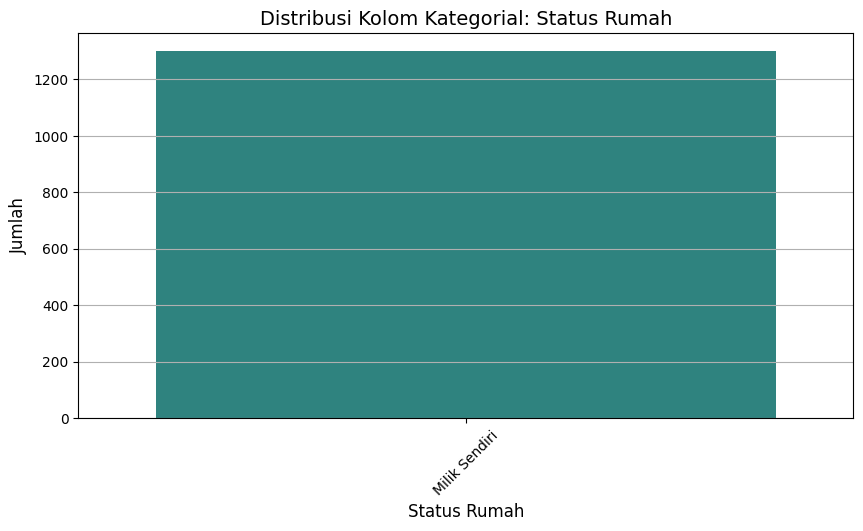

<ipython-input-6-56988e6b557f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


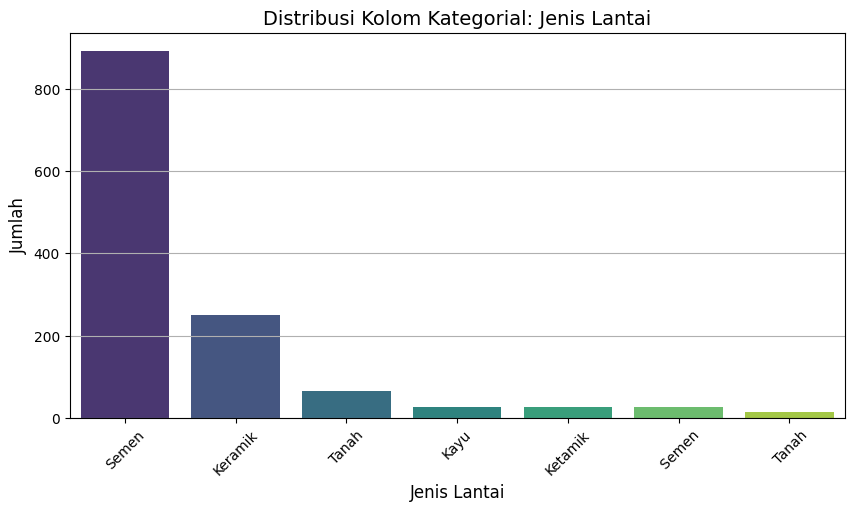

<ipython-input-6-56988e6b557f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


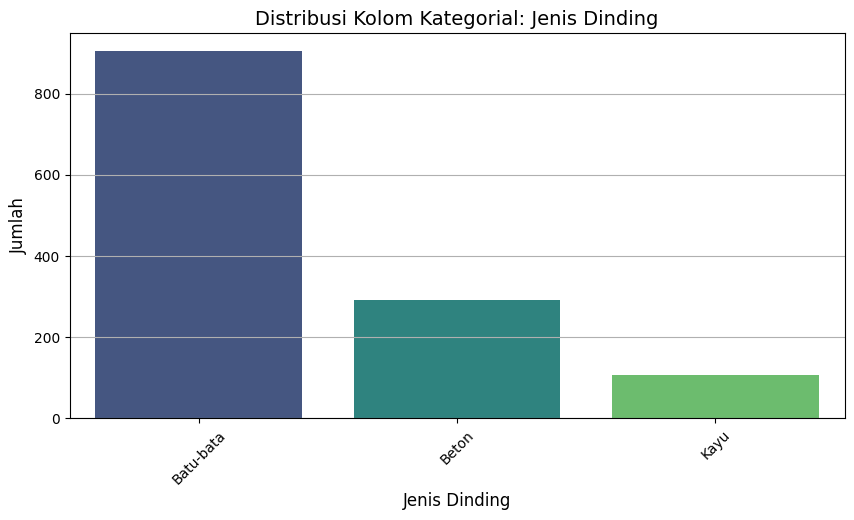

<ipython-input-6-56988e6b557f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


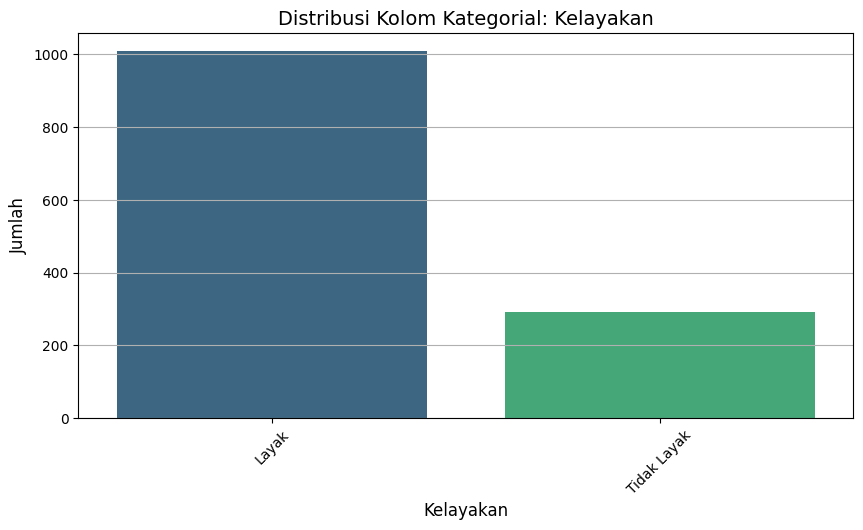

In [6]:
# Visualisasi kolom kategorial
categorical_columns = ['Pekerjaan', 'Status Rumah', 'Jenis Lantai', 'Jenis Dinding', 'Kelayakan']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribusi Kolom Kategorial: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.show()


In [7]:
# Menghitung batas atas dan batas bawah untuk kolom 'Penghasilan'
Q1 = df['Penghasilan'].quantile(0.25)
Q3 = df['Penghasilan'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

# Mengganti outlier dengan nilai batas atas dan batas bawah
df['Penghasilan'] = df['Penghasilan'].clip(lower=batas_bawah, upper=batas_atas)

In [8]:
# Menghitung batas atas dan batas bawah untuk kolom 'Usia'
Q1 = df['Usia'].quantile(0.25)
Q3 = df['Usia'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

# Mengganti outlier dengan nilai batas atas dan batas bawah
df['Usia'] = df['Usia'].clip(lower=batas_bawah, upper=batas_atas)

In [9]:
# Statistik deskriptif setelah capping
print(df[['Penghasilan', 'Usia']].describe())


        Penghasilan         Usia
count  1.299000e+03  1299.000000
mean   6.468437e+05    57.717475
std    3.525409e+05     9.394755
min    1.000000e+05    40.000000
25%    4.000000e+05    55.000000
50%    5.000000e+05    60.000000
75%    8.000000e+05    65.000000
max    1.400000e+06    80.000000


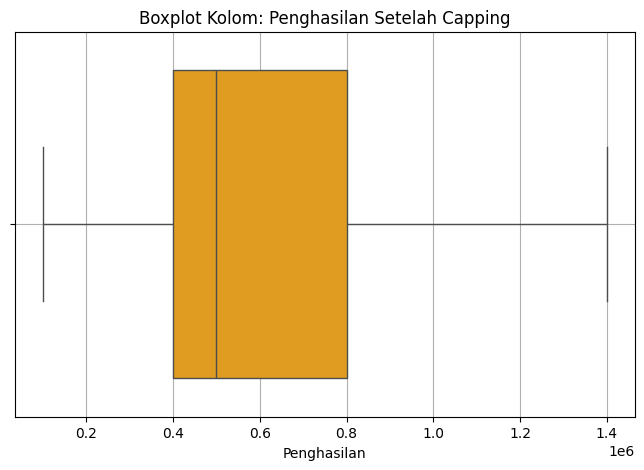

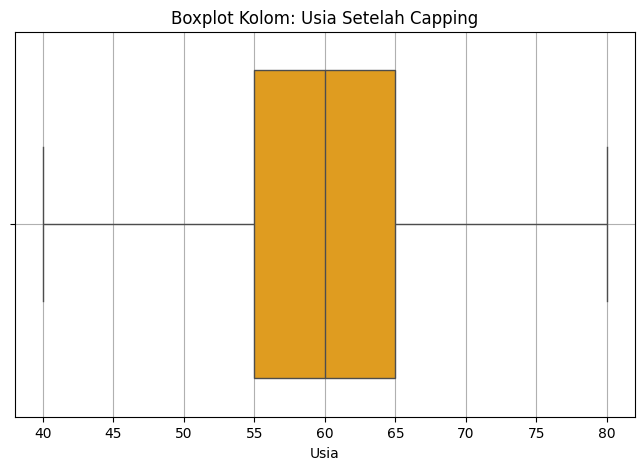

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#boxplot untuk melihat apakah outlier masih ada setelah capping
for col in ['Penghasilan', 'Usia']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f'Boxplot Kolom: {col} Setelah Capping')
    plt.grid(True)
    plt.show()


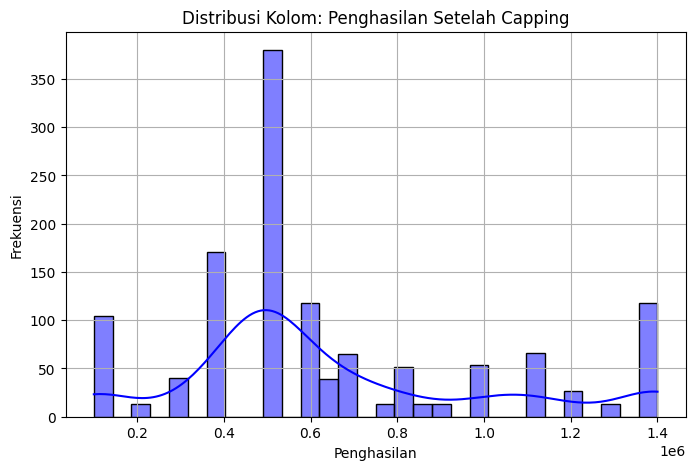

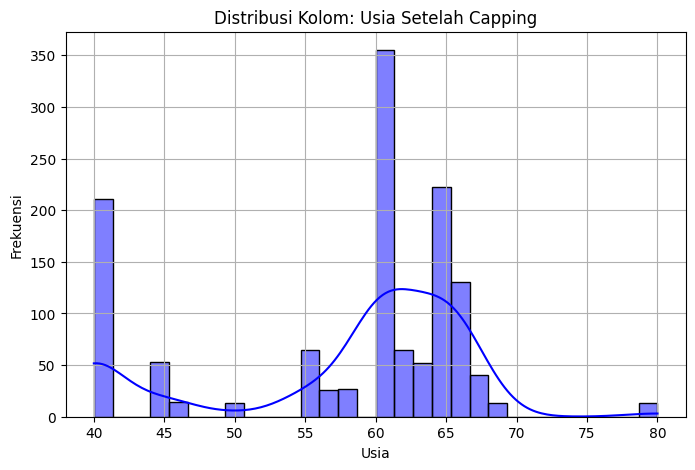

In [11]:
for col in ['Penghasilan', 'Usia']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribusi Kolom: {col} Setelah Capping')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()


##Preprocessing Data

In [12]:
df = df.drop(columns=['Nama'])
#Menghapus kolom

In [13]:
df = df.drop(columns=['NIK'])
#menghapus kolom

In [14]:
df = df.drop(columns=['Status Rumah'])
#menghapus kolom

In [15]:
df = df.drop(columns=['Penyandang Disabilitas'])
#menghapus kolom

In [16]:
# Strip any extra whitespace from column names
df.columns = df.columns.str.strip()
#Menjaga kebersihan dan konsistensi nama kolom.
#Memastikan referensi kolom bekerja dengan benar tanpa adanya spasi yang tidak diinginkan.

In [17]:
# Membersihkan spasi di awal dan akhir nilai pada kolom 'Pekerjaan' dan 'Jenis Lantai'
df['Pekerjaan'] = df['Pekerjaan'].str.strip()
df['Jenis Lantai'] = df['Jenis Lantai'].str.strip()


In [18]:
df['Pekerjaan'] = df['Pekerjaan'].str.lower()


In [19]:
df['Pekerjaan'] = df['Pekerjaan'].replace({'petani': 'Petani', 'buruh': 'Buruh','penjahit' : 'Penjahit', 'pns' : 'PNS', 'tidak bekerja':'Tidak Bekerja' })


In [20]:
df['Jenis Lantai'] = df['Jenis Lantai'].replace({' Semen': 'Semen', 'Ketamik': 'Keramik', ' Tanah': 'Tanah'})


In [21]:
#cek unique value setiap kolom
for column in df.columns:
    # Mencetak nama kolom
    print(f"Column: {column}")

    # Mencetak nilai unik dari kolom tersebut
    unique_values = df[column].unique()
    print(unique_values)

    # Jarak antar kolom
    print("-" * 30)

Column: Usia
[40 65 60 44 67 46 61 62 64 45 66 56 63 55 50 57 58 68 80]
------------------------------
Column: Pekerjaan
['Buruh' 'Petani' 'Penjahit' 'PNS' 'Tidak Bekerja']
------------------------------
Column: Penghasilan
[1200000  400000 1100000  500000 1400000  300000 1000000  600000  800000
 1300000  700000  900000  650000  850000  750000  100000  200000]
------------------------------
Column: Jumlah Anggota Keluarga
[4 6 3 5 7 8 2]
------------------------------
Column: Jumlah Tanggungan Anak
[2 3 1 4 5 6 0]
------------------------------
Column: Jenis Lantai
['Keramik' 'Semen' 'Kayu' 'Tanah']
------------------------------
Column: Jenis Dinding
['Beton' 'Batu-bata' 'Kayu']
------------------------------
Column: Kelayakan
['Tidak Layak' 'Layak']
------------------------------


In [22]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OrdinalEncoder
import pickle

In [23]:
# Labeling Usia (Updated)
def label_usia(usia):
    if usia < 45:
        return 'Muda'
    elif 45 <= usia <= 65:
        return 'Dewasa'
    else:
        return 'Tua'

df['Label Usia'] = df['Usia'].apply(label_usia)

# Labeling Pekerjaan (Ordinal Encoding for Updated Data)
pekerjaan_label = ['Buruh', 'Petani', 'Penjahit', 'PNS', 'Tidak Bekerja']  # Updated order
ordinal_encoder = OrdinalEncoder(categories=[pekerjaan_label])  # Ordinal encoding with order
df['Label Pekerjaan'] = ordinal_encoder.fit_transform(df[['Pekerjaan']])
# Simpan encoder pekerjaan
pickle.dump(ordinal_encoder, open("ordinal_encoder.pkl", "wb"))

# Labeling Penghasilan (Updated Ranges)
def label_penghasilan(penghasilan):
    if penghasilan < 700000:  # Adjusted lower threshold for "Rendah"
        return 'Rendah'
    elif 700000 <= penghasilan <= 1300000:  # Adjusted middle range for "Sedang"
        return 'Sedang'
    else:
        return 'Tinggi'

df['Label Penghasilan'] = df['Penghasilan'].apply(label_penghasilan)

# Labeling Jenis Lantai (No Changes Needed)
lantai_label = {'Keramik': 0, 'Semen': 1, 'Kayu': 2, 'Tanah': 3}
df['Label Lantai'] = df['Jenis Lantai'].map(lantai_label)

# Labeling Jenis Dinding (No Changes Needed)
dinding_label = {'Beton': 0, 'Batu-bata': 1, 'Kayu': 2}
df['Label Dinding'] = df['Jenis Dinding'].map(dinding_label)

# Labeling Kelayakan (No Changes Needed)
kelayakan_label = {'Tidak Layak': 0, 'Layak': 1}
df['Label Kelayakan'] = df['Kelayakan'].map(kelayakan_label)

# Convert categorical labels (Usia and Penghasilan) to numerical
df['Label Usia'] = df['Label Usia'].map({'Muda': 0, 'Dewasa': 1, 'Tua': 2})
df['Label Penghasilan'] = df['Label Penghasilan'].map({'Rendah': 0, 'Sedang': 1, 'Tinggi': 2})

# Preview updated dataframe
print(df[['Usia', 'Pekerjaan', 'Penghasilan', 'Label Usia', 'Label Pekerjaan', 'Label Penghasilan']].head())


   Usia Pekerjaan  Penghasilan  Label Usia  Label Pekerjaan  Label Penghasilan
0    40     Buruh      1200000           0              0.0                  1
1    65    Petani       400000           1              1.0                  0
2    40     Buruh      1100000           0              0.0                  1
3    60    Petani       500000           1              1.0                  0
4    44     Buruh      1400000           0              0.0                  2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Usia                     1299 non-null   int64  
 1   Pekerjaan                1299 non-null   object 
 2   Penghasilan              1299 non-null   int64  
 3   Jumlah Anggota Keluarga  1299 non-null   int64  
 4   Jumlah Tanggungan Anak   1299 non-null   int64  
 5   Jenis Lantai             1299 non-null   object 
 6   Jenis Dinding            1299 non-null   object 
 7   Kelayakan                1299 non-null   object 
 8   Label Usia               1299 non-null   int64  
 9   Label Pekerjaan          1299 non-null   float64
 10  Label Penghasilan        1299 non-null   int64  
 11  Label Lantai             1299 non-null   int64  
 12  Label Dinding            1299 non-null   int64  
 13  Label Kelayakan          1299 non-null   int64  
dtypes: float64(1), int64(9),

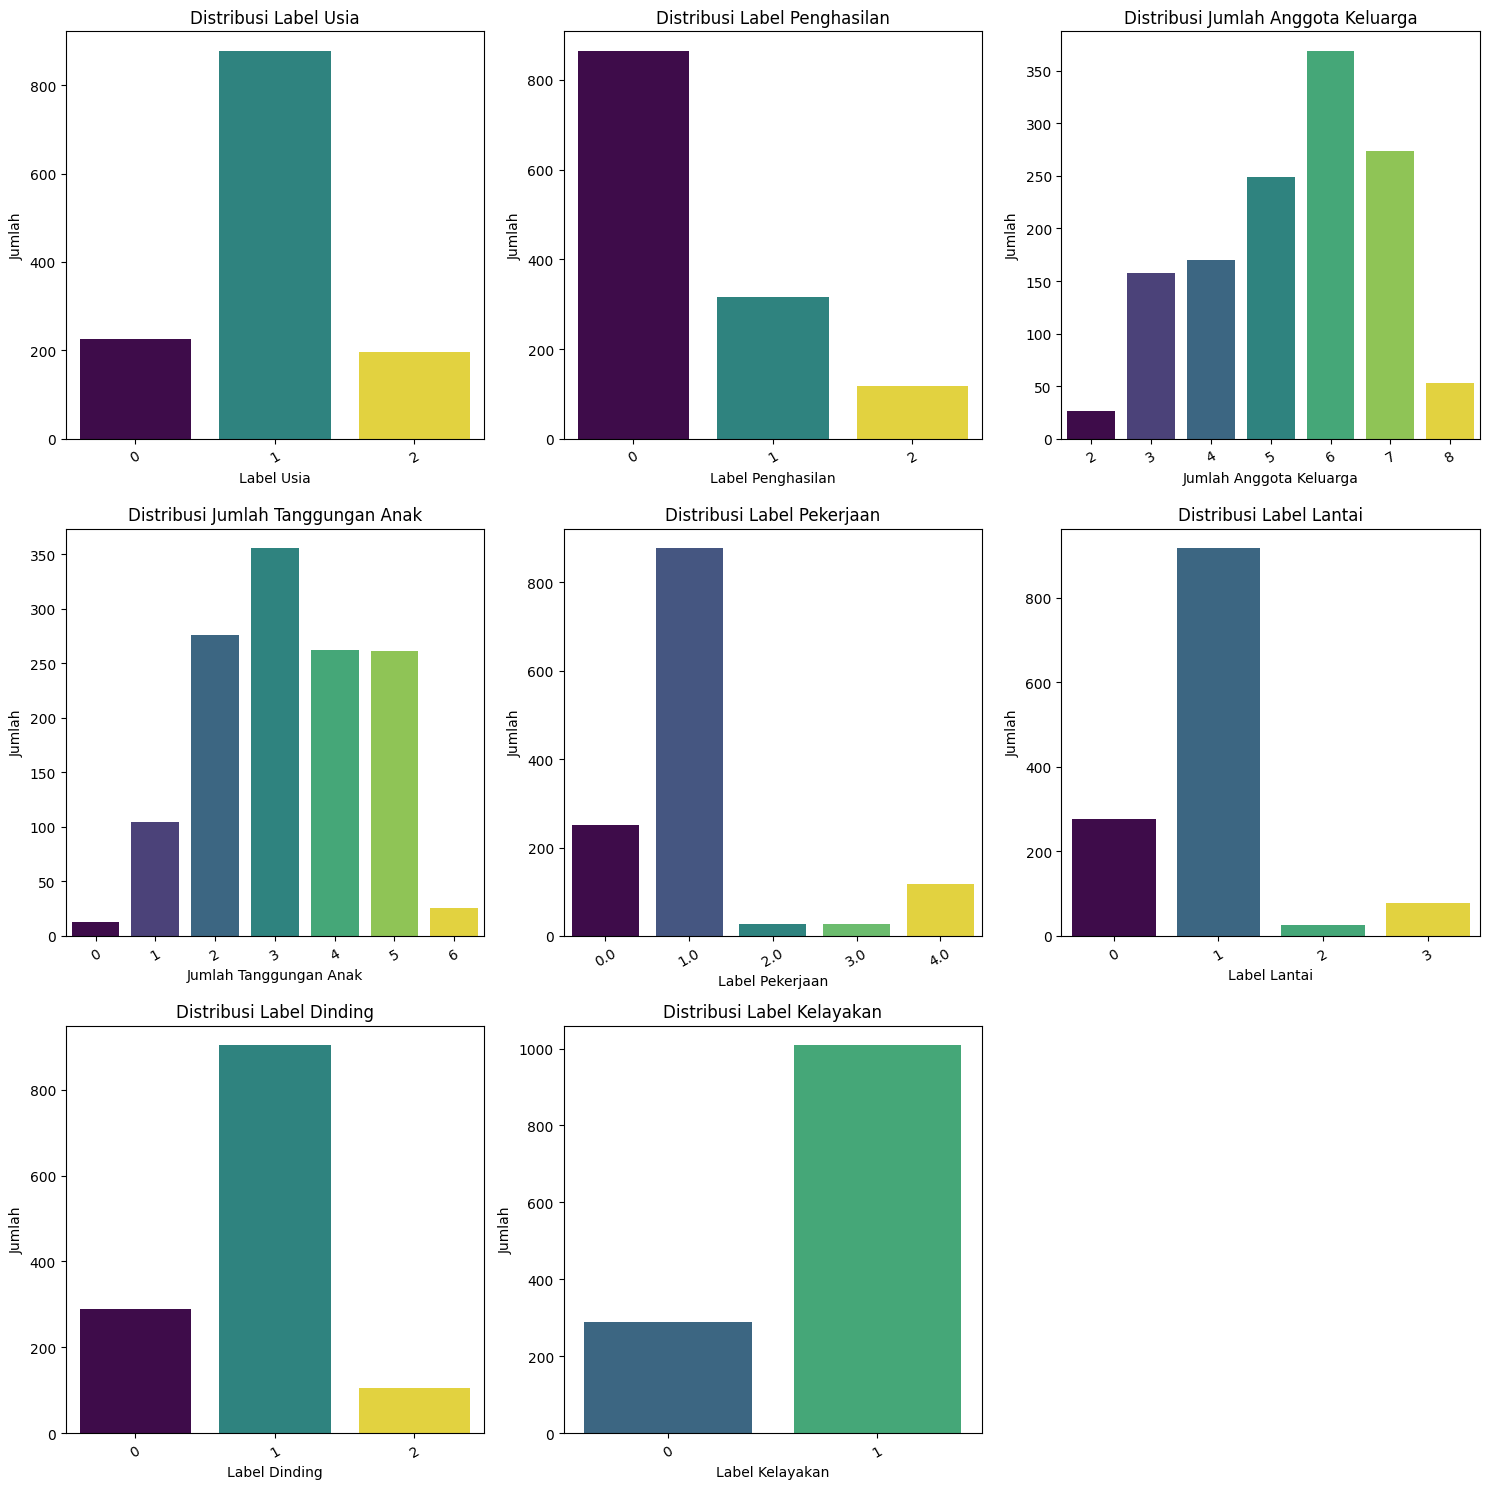

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom kategorikal yang ingin dianalisis
categorical_columns = ['Label Usia', 'Label Penghasilan', 'Jumlah Anggota Keluarga',
                       'Jumlah Tanggungan Anak', 'Label Pekerjaan', 'Label Lantai',
                       'Label Dinding', 'Label Kelayakan']

# Menentukan jumlah baris dan kolom pada subplot agar sesuai dengan jumlah kategori
num_cols = len(categorical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Menyesuaikan jumlah baris

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette="viridis", legend=False)  # hue untuk warna unik
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=30)  # Rotasi label jika perlu

plt.tight_layout()
plt.show()


Bagus! Distribusi datanya sudah terlihat dengan baik.

Analisis Singkat dari Distribusi Data
Label Usia → Mayoritas berada di kategori "Dewasa" (kode 1).
Label Penghasilan → Sebagian besar berada di kategori "Rendah" (kode 2).
Jumlah Anggota Keluarga & Jumlah Tanggungan Anak → Distribusi cukup bervariasi, tetapi ada puncak di jumlah tertentu.
Label Pekerjaan → Mayoritas adalah kategori 1 (kemungkinan besar "Buruh" sesuai urutan encoding).
Label Lantai & Dinding → Mayoritas dalam kategori tertentu (mungkin "Semen" untuk lantai dan "Batu-bata" untuk dinding).
Label Kelayakan → Data terlihat imbalanced, dengan lebih banyak sampel di kategori "Layak" (kode 1).

apakah distribusi dari label lantai dan label dinding ini yang dapat menyebabkan model overfittinh?

1️⃣ Apakah Distribusi yang Tidak Seimbang Bisa Menyebabkan Overfitting?
Ya, bisa terjadi overfitting jika fitur ini memiliki pengaruh yang besar terhadap prediksi tetapi variasinya terlalu sedikit. Contoh kasus:

Jika hampir semua data memiliki jenis lantai dan dinding yang sama, model bisa terlalu bergantung pada fitur ini, tetapi tidak bisa generalisasi untuk variasi yang lebih kecil.
Model bisa hanya mengingat pola mayoritas dan mengabaikan kelas yang lebih jarang.
Namun, tidak selalu distribusi yang tidak seimbang menyebabkan overfitting. Kita perlu cek apakah fitur ini benar-benar berpengaruh besar terhadap prediksi.

3️⃣ Bagaimana Solusinya Jika Ini Menyebabkan Overfitting?
Jika hasil analisis menunjukkan bahwa Label Lantai dan Label Dinding sangat dominan dalam prediksi, ada beberapa solusi:
✅ Coba hapus fitur ini & bandingkan hasil model

Jika akurasi model tetap sama setelah fitur ini dihapus, berarti fitur ini tidak begitu berguna.
Jika akurasi turun drastis, berarti fitur ini memang berkontribusi, tapi bisa jadi model overfitting.
✅ Gunakan teknik Regularization atau Pruning
Jika memakai Random Forest atau Decision Tree, gunakan parameter max_depth untuk mencegah model terlalu menghafal pola tertentu.
✅ Coba Feature Selection dengan metode lain
Misalnya menggunakan SelectKBest atau mutual_info_classif untuk memilih fitur yang benar-benar penting.
Kesimpulan
🚨 Distribusi tidak seimbang dari Label Lantai dan Label Dinding bisa menyebabkan overfitting jika model terlalu bergantung pada fitur ini.
📊 Cek korelasi dan feature importance terlebih dahulu sebelum mengambil keputusan.
🔧 Jika perlu, coba hapus fitur ini & lihat apakah hasilnya tetap baik.

Kamu ingin coba analisis korelasi atau feature importance sekarang? 🚀

In [26]:
# Menghapus kolom asli yang sudah digantikan oleh label
df = df.drop(['Usia', 'Pekerjaan', 'Penghasilan', 'Jenis Lantai', 'Jenis Dinding', 'Kelayakan'], axis=1)

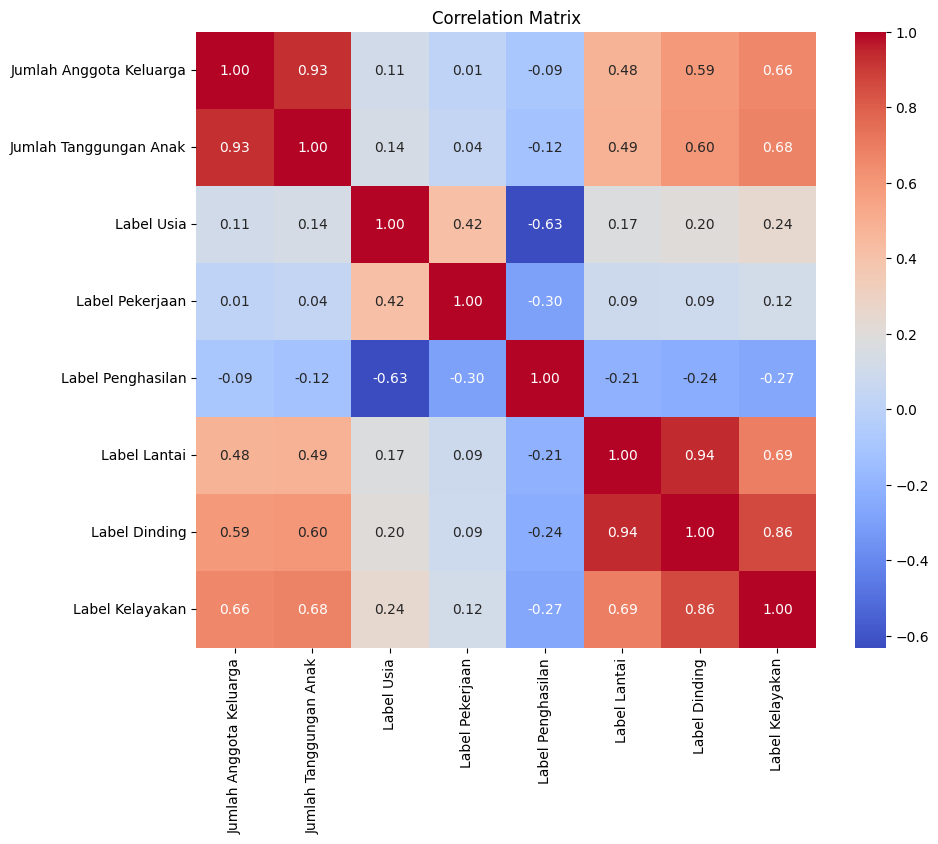

In [27]:
# Memilih hanya kolom yang bertipe numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Menghitung matriks korelasi
corr_matrix = df_numeric.corr()

# Menampilkan hasil korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Label Kelayakan'].abs().sort_values(ascending=False)
print(correlation_with_target)

Label Kelayakan            1.000000
Label Dinding              0.863029
Label Lantai               0.689495
Jumlah Tanggungan Anak     0.676440
Jumlah Anggota Keluarga    0.660477
Label Penghasilan          0.265569
Label Usia                 0.242192
Label Pekerjaan            0.117028
Name: Label Kelayakan, dtype: float64


In [29]:
selected_features = ['Jumlah Anggota Keluarga', 'Jumlah Tanggungan Anak', 'Label Penghasilan', 'Label Usia', 'Label Pekerjaan']
X = df[selected_features]
y = df['Label Kelayakan']

## Split Data

In [30]:
# Split data sebelum SMOTE (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [31]:
# Cek distribusi sebelum SMOTE
print("Class distribution in training data before oversampling:")
print(y_train.value_counts())

Class distribution in training data before oversampling:
Label Kelayakan
1    807
0    232
Name: count, dtype: int64


##SMOTE


In [32]:
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
smote =SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

In [33]:
# Cek distribusi setelah SMOTE
print("Class distribution in training data after oversampling:")
print(y_train_resampled.value_counts())

Class distribution in training data after oversampling:
Label Kelayakan
1    807
0    807
Name: count, dtype: int64


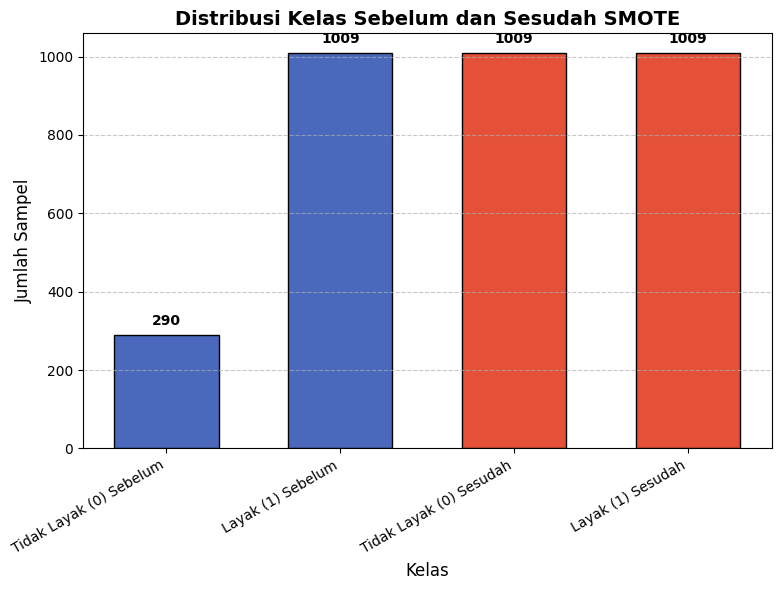

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Data sebelum dan sesudah SMOTE
before_counts = Counter({1: 1009, 0: 290})
after_counts = Counter({1: 1009, 0: 1009})

# Kelas dan jumlah sampel
labels = ["Tidak Layak (0) Sebelum", "Layak (1) Sebelum", "Tidak Layak (0) Sesudah", "Layak (1) Sesudah"]
values = [before_counts[0], before_counts[1], after_counts[0], after_counts[1]]

x = np.arange(len(labels))  # Lokasi untuk label pada sumbu x

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(x, values, color=['#4a69bd', '#4a69bd', '#e55039', '#e55039'], width=0.6, edgecolor='black')

# Labeling
ax.set_xlabel("Kelas", fontsize=12)
ax.set_ylabel("Jumlah Sampel", fontsize=12)
ax.set_title("Distribusi Kelas Sebelum dan Sesudah SMOTE", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha="right", fontsize=10)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Menampilkan jumlah di atas batang
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5),  # Offset vertikal
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


##Modelling

In [35]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth':  [5, 10, 20, 30],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy"],
    'max_features': ['sqrt', 'log2', None]
}
# Membuat model RandomForest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV untuk pencarian hyperparameter
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih model dengan GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan hasil terbaik dari GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

In [36]:
rf_model1 = RandomForestClassifier(
    n_estimators=50,            # Lebih banyak pohon untuk stabilitas
    max_depth=None,                 # Batasi kedalaman pohon
    max_features="sqrt",         # Pilih subset lebih kecil dari fitur
    min_samples_split=2,        # Minimum sampel untuk split
    min_samples_leaf=1,          # Minimum sampel di setiap daun
    criterion= "gini",

)

rf_model1.fit(X_train_resampled, y_train_resampled)
y_pred_rf_smote = rf_model1.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))


Akurasi Random Forest: 0.9884615384615385
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.99      0.99       202

    accuracy                           0.99       260
   macro avg       0.98      0.99      0.98       260
weighted avg       0.99      0.99      0.99       260



##Evaluasi Cross-validation

In [37]:
# Cross-validation (10 vold)
cv_scores = cross_val_score(rf_model1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Menampilkan hasil cross-validation
print("Skor Cross-validation untuk setiap fold:", cv_scores)
print("Rata-rata skor cross-validation:", np.mean(cv_scores))

Skor Cross-validation untuk setiap fold: [0.97530864 0.95061728 0.96296296 0.94444444 0.9689441  0.96273292
 0.95031056 0.9689441  0.98757764 0.98136646]
Rata-rata skor cross-validation: 0.9653209109730849


In [38]:
from sklearn.metrics import roc_auc_score, confusion_matrix
import numpy as np

# Prediksi pada data uji
y_pred_rf_smote = rf_model1.predict(X_test)
y_pred_proba = rf_model1.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_smote)
tn, fp, fn, tp = cm.ravel()

# Hitung sensitivity (recall untuk kelas positif)
sensitivity = tp / (tp + fn)

# Hitung specificity
specificity = tn / (tn + fp)

# Hitung AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Hitung G-Mean
gmean = np.sqrt(sensitivity * specificity)

# Tampilkan hasil
print(f"Confusion Matrix:\n{cm}")
print(f"Sensitivity (Recall Positif): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"G-Mean: {gmean:.4f}")


Confusion Matrix:
[[ 58   0]
 [  3 199]]
Sensitivity (Recall Positif): 0.9851
Specificity: 1.0000
AUC Score: 0.9967
G-Mean: 0.9925


In [44]:

pickle.dump(rf_model1, open("modelrf1.pkl", "wb"))

In [39]:
# Fungsi untuk mengukur waktu komputasi model
import time
def evaluate_model(rf_model1, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    return train_time, predict_time, accuracy

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Random Forest dengan parameter default
rf_model_default = RandomForestClassifier(random_state=0)

# Melatih model dengan data yang sudah diresampling
rf_model_default.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi pada data uji
y_pred_rf_default = rf_model_default.predict(X_test)

# Evaluasi model
print("Akurasi Random Forest (Default):", accuracy_score(y_test, y_pred_rf_default))
print(classification_report(y_test, y_pred_rf_default))


Akurasi Random Forest (Default): 0.9884615384615385
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.99      0.99       202

    accuracy                           0.99       260
   macro avg       0.98      0.99      0.98       260
weighted avg       0.99      0.99      0.99       260



In [41]:
import time

# Catat waktu training
start_train = time.time()
rf_model1.fit(X_train_resampled, y_train_resampled)
end_train = time.time()

# Catat waktu prediksi
start_pred = time.time()
y_pred_rf_default = rf_model_default.predict(X_test)
end_pred = time.time()

# Evaluasi
accuracy = accuracy_score(y_test, y_pred_rf_default)
print("Akurasi Random Forest (Default):", accuracy)
print(classification_report(y_test, y_pred_rf_default))
print(f"Waktu Training: {end_train - start_train:.4f} detik")
print(f"Waktu Prediksi: {end_pred - start_pred:.4f} detik")


Akurasi Random Forest (Default): 0.9884615384615385
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.99      0.99       202

    accuracy                           0.99       260
   macro avg       0.98      0.99      0.98       260
weighted avg       0.99      0.99      0.99       260

Waktu Training: 0.2277 detik
Waktu Prediksi: 0.0368 detik


In [42]:
# Cross-validation (10 vold)
cv_scores = cross_val_score(rf_model_default, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Menampilkan hasil cross-validation
print("Skor Cross-validation untuk setiap fold:", cv_scores)
print("Rata-rata skor cross-validation:", np.mean(cv_scores))

Skor Cross-validation untuk setiap fold: [0.97530864 0.95061728 0.96296296 0.94444444 0.9689441  0.96273292
 0.9689441  0.9689441  0.98757764 0.98136646]
Rata-rata skor cross-validation: 0.9671842650103522


In [43]:
# Prediksi dengan data uji
y_pred_rf_default = rf_model_default.predict(X_test)
y_pred_proba_default = rf_model_default.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# Buat confusion matrix
cm_default = confusion_matrix(y_test, y_pred_rf_default)
tn, fp, fn, tp = cm_default.ravel()

# Hitung sensitivity (recall untuk kelas positif)
sensitivity_default = tp / (tp + fn)

# Hitung specificity
specificity_default = tn / (tn + fp)

# Hitung AUC
auc_score_default = roc_auc_score(y_test, y_pred_proba_default)

# Hitung G-Mean
gmean_default = np.sqrt(sensitivity_default * specificity_default)

# Tampilkan hasil
print(f"Confusion Matrix (Default):\n{cm_default}")
print(f"Sensitivity (Recall Positif): {sensitivity_default:.4f}")
print(f"Specificity: {specificity_default:.4f}")
print(f"AUC Score: {auc_score_default:.4f}")
print(f"G-Mean: {gmean_default:.4f}")

Confusion Matrix (Default):
[[ 58   0]
 [  3 199]]
Sensitivity (Recall Positif): 0.9851
Specificity: 1.0000
AUC Score: 0.9967
G-Mean: 0.9925
